In [1]:
file_demographics = 'm5_survey_data_demographics.csv'
file_technologies = 'm5_survey_data_technologies_normalised.csv'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_tech = pd.read_csv(file_technologies)
df_tech.info(), df_tech.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              74589 non-null  float64
 1   LanguageWorkedWith      59792 non-null  object 
 2   LanguageDesireNextYear  55764 non-null  object 
 3   DatabaseWorkedWith      31375 non-null  object 
 4   DatabaseDesireNextYear  29575 non-null  object 
 5   PlatformWorkedWith      39208 non-null  object 
 6   PlatformDesireNextYear  44314 non-null  object 
 7   WebFrameWorkedWith      24803 non-null  object 
 8   WebFrameDesireNextYear  24567 non-null  object 
 9   DevEnviron              33306 non-null  object 
 10  OpSys                   0 non-null      float64
 11  Containers              0 non-null      float64
 12  BlockchainOrg           0 non-null      float64
 13  BlockchainIs            0 non-null      float64
dtypes: float64(5), object(9)
memory usage:

(None,
 Respondent                    1
 LanguageWorkedWith        14798
 LanguageDesireNextYear    18826
 DatabaseWorkedWith        43215
 DatabaseDesireNextYear    45015
 PlatformWorkedWith        35382
 PlatformDesireNextYear    30276
 WebFrameWorkedWith        49787
 WebFrameDesireNextYear    50023
 DevEnviron                41284
 OpSys                     74590
 Containers                74590
 BlockchainOrg             74590
 BlockchainIs              74590
 dtype: int64)

In [15]:
df_tech['Respondent'].isnull().sum()

1

In [16]:
df_demographics = pd.read_csv(file_demographics)
df_demographics.info(), df_demographics.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      11398 non-null  int64  
 1   MainBranch      11398 non-null  object 
 2   Hobbyist        11398 non-null  object 
 3   OpenSourcer     11398 non-null  object 
 4   OpenSource      11317 non-null  object 
 5   Employment      11398 non-null  object 
 6   Country         11398 non-null  object 
 7   Student         11347 non-null  object 
 8   EdLevel         11286 non-null  object 
 9   UndergradMajor  10661 non-null  object 
 10  EduOther        11234 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  DevType         11333 non-null  object 
 13  YearsCode       11389 non-null  object 
 14  Age1stCode      11385 non-null  object 
 15  YearsCodePro    11382 non-null  object 
 16  CareerSat       11398 non-null  object 
 17  JobSat          11397 non-null 

(None,
 Respondent        0
 MainBranch        0
 Hobbyist          0
 OpenSourcer       0
 OpenSource       81
                ... 
 Sexuality       542
 Ethnicity       675
 Dependents      140
 SurveyLength     19
 SurveyEase       14
 Length: 70, dtype: int64)

## Current Technology Usage

### Panel 1 [Bar]: Top 10 Languages Worked With 

In [17]:
df_tech["LanguageWorkedWith"].unique(), df_tech["LanguageWorkedWith"].nunique()

(array([nan, 'C', 'C++', 'C#', 'Python', 'SQL', 'Bash/Shell/PowerShell',
        'HTML/CSS', 'JavaScript', 'Ruby', 'Rust', 'TypeScript',
        'WebAssembly', 'Other(s):', 'PHP', 'VBA', 'Java', 'R', 'Swift',
        'Objective-C', 'Go', 'Kotlin', 'F#', 'Erlang', 'Assembly', 'Scala',
        'Elixir', 'Clojure', 'Dart'], dtype=object),
 28)

In [50]:
df_tech_no_na = df_tech.dropna(subset=['Respondent'])
df_tech_no_na.shape,df_tech.shape

((74589, 14), (74590, 14))

In [51]:
df_tech_no_na["LanguageWorkedWith"].unique(), df_tech_no_na["LanguageWorkedWith"].nunique()

(array(['C', 'C++', 'C#', 'Python', 'SQL', 'Bash/Shell/PowerShell',
        'HTML/CSS', 'JavaScript', 'Ruby', 'Rust', 'TypeScript',
        'WebAssembly', 'Other(s):', 'PHP', nan, 'VBA', 'Java', 'R',
        'Swift', 'Objective-C', 'Go', 'Kotlin', 'F#', 'Erlang', 'Assembly',
        'Scala', 'Elixir', 'Clojure', 'Dart'], dtype=object),
 28)

In [36]:
# import math
# val = float(df_tech.iloc[0]['Respondent'])
# math.isnan(val)

True

In [60]:
top10_language = df_tech_no_na.groupby('LanguageWorkedWith').count()
top10_language.sort_values('Respondent',ascending=False, inplace=True)
top10_language = top10_language.iloc[:10]['Respondent']
top10_language

LanguageWorkedWith
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
Name: Respondent, dtype: int64

In [89]:
def formatNumber(val):
    return '{:,.0f}'.format(val)

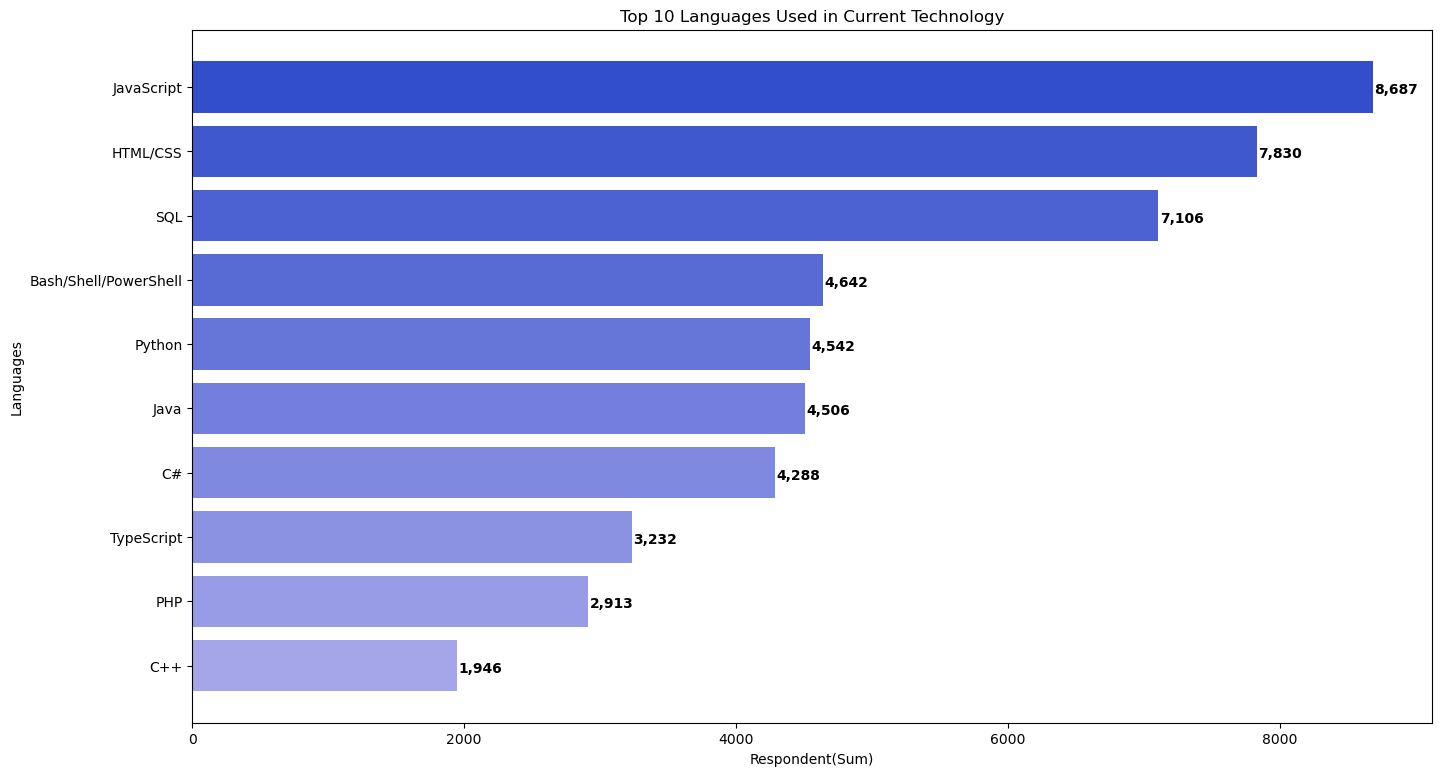

In [217]:
# fig = plt.figure(figsize = (10, 5))
colors_blue = ["#324ECB","#3F58CE","#4C62D2","#586BD5","#6575D8","#727FDC","#7F89DF","#8B92E2","#989CE6","#A5A6E9"]#["#A5ABC7","#9499BE","#8388B6","#7276AD","#6165A5","#4F539C","#3E4294","#2D308B","#1C1F83","#0B0D7A"]
fig, ax = plt.subplots(figsize =(16, 9))
def drawBar(ax, data, color=colors_blue,title="Top 10 Languages Used in Current Technology"):
    ax.barh(data.index, data,color=color)
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+10, i.get_y()+0.5, 
                 formatNumber(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='black')
    plt.xlabel("Respondent(Sum)")
    plt.ylabel("Languages")
    plt.title(title)
    plt.show()
drawBar(ax,top10_language)

### Panel 2 [Column]: 10 Databases Worked With

In [69]:
top10_db = df_tech_no_na.groupby('DatabaseWorkedWith').count()
top10_db.sort_values('Respondent',ascending=False, inplace=True)
top10_db = top10_db.iloc[:10]['Respondent']
top10_db

DatabaseWorkedWith
MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
Name: Respondent, dtype: int64

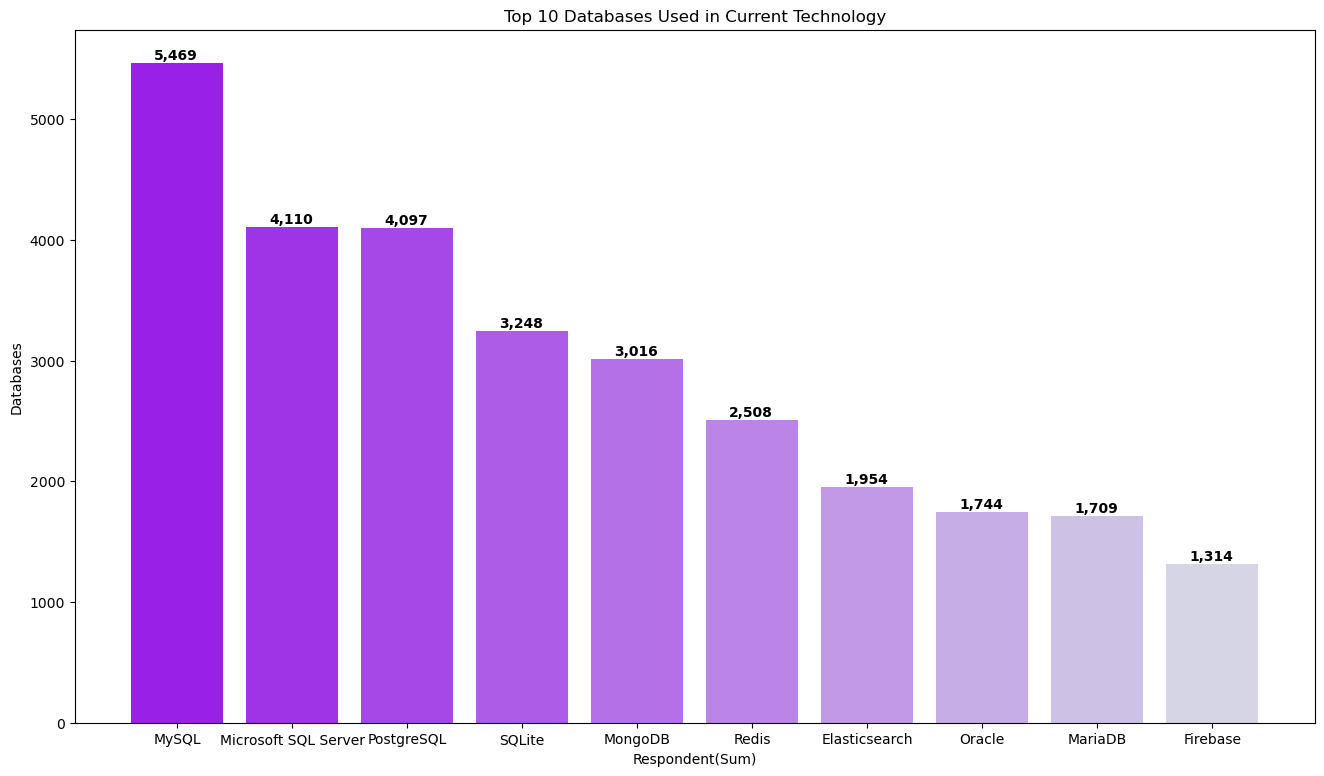

In [218]:
colors_purple = ["#9820E7","#9F34E7","#A648E7","#AC5CE7","#B370E7","#BA85E6","#C199E6","#C7ADE6","#CEC1E6","#D5D5E6"]

fig, ax = plt.subplots(figsize =(16, 9))
# creating the bar plot
# plt.bar(top10_language.index, top10_language, color ='maroon', 
#         width = 0.4)
def drawColumn(ax,data,color=colors_purple,title="Top 10 Databases Used in Current Technology"):
    ax.bar(data.index, data,color=color)
    for i in ax.patches:
        plt.text(i.get_x()+0.2, i.get_height()+30, 
                 formatNumber(round((i.get_height()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='black')
    plt.xlabel("Respondent(Sum)")
    plt.ylabel("Databases")
    plt.title(title)
    plt.show()
drawColumn(ax,top10_db)

/var/folders/0h/2vn5vvwd7px9f7gshycy68hr0000gp/T/ipykernel_50898/324540672.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(top10_language.index, rotation=90)


Text(0.5, 1.0, 'Top 10 Databases Used in Current Technology')

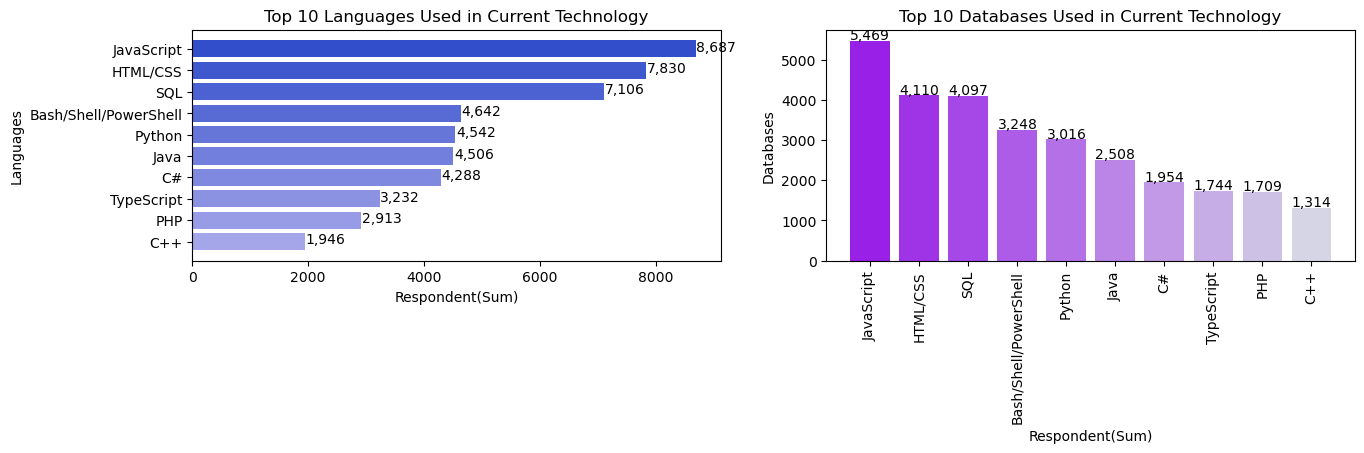

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
# fig.tight_layout()
# plt.figure(figsize=(10, 6))
ax1.barh(top10_language.index, top10_language,color=colors_blue)
ax1.invert_yaxis()
# Add annotation to bars
for i in ax1.patches:
    ax1.text(i.get_width()+10, i.get_y()+0.5, 
        formatNumber(round((i.get_width()), 2)),
        fontsize = 10, #fontweight ='bold',
        color ='black')
ax1.set_xlabel("Respondent(Sum)")
ax1.set_ylabel("Languages")
ax1.set_title("Top 10 Languages Used in Current Technology")
ax2.bar(top10_db.index, top10_db,color=colors_purple)
for i in ax2.patches:
    ax2.text(i.get_x(), i.get_height()+30, 
        formatNumber(round((i.get_height()), 2)),
        fontsize = 10, #fontweight ='bold',
        color ='black')
ax2.set_xlabel("Respondent(Sum)")
ax2.set_xticklabels(top10_language.index, rotation=90)  
ax2.set_ylabel("Databases")
ax2.set_title("Top 10 Databases Used in Current Technology")
# plt.subplots_adjust(wspace=1)

### Panel 3[Word Cloud]: Platforms Worked With

In [159]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [160]:
from wordcloud import WordCloud

In [162]:
df_platform = df_tech_no_na["PlatformWorkedWith"].dropna()
df_platform

1               Linux
2             Windows
6                 AWS
7              Docker
8              Heroku
             ...     
74572         Android
74573             iOS
74574         Windows
74582           Linux
74583    Raspberry Pi
Name: PlatformWorkedWith, Length: 39208, dtype: object

(-0.5, 799.5, 399.5, -0.5)

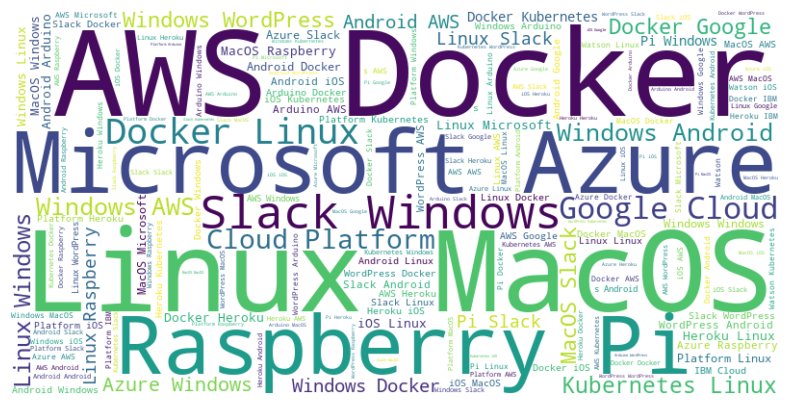

In [165]:
text = ' '.join(df_platform.tolist())
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.show()

In [171]:
wordcloud.to_file("platforms_word_cloud.png")

### Panel 4[Hierarchy Bubble Chart]: Top 10 Web Frameworks Worked With

In [177]:
top10_webframework = df_tech_no_na.groupby('WebFrameWorkedWith').count()
top10_webframework.sort_values('Respondent',ascending=False, inplace=True)
top10_webframework = top10_webframework.iloc[:10]['Respondent']
top10_webframework
top10_webframework.to_list()

[4629, 3327, 3302, 3042, 2028, 1728, 1485, 1186, 1176, 939]

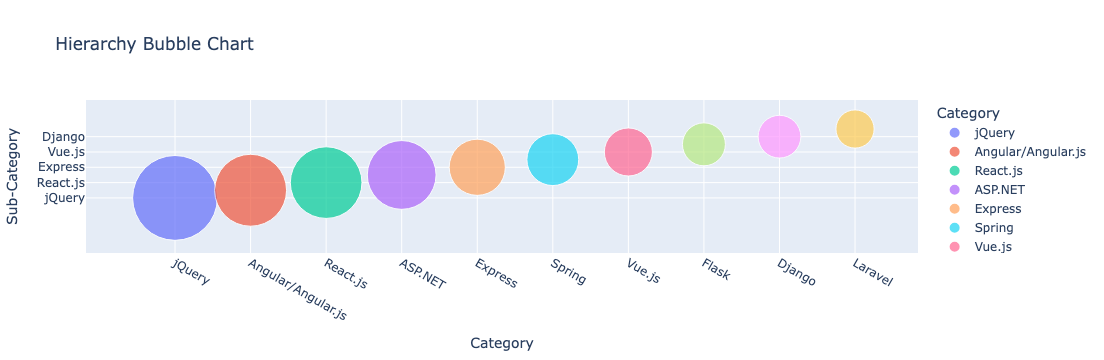

In [221]:
import plotly.express as px

def drawHierarchyBubble(data=top10_webframework):
    # Sample DataFrame with hierarchical data
    data = {
        'Category': data.index.to_list(),
        'Sub-Category': data.index.to_list(),
        'Value': data.to_list()
    }
    
    df_wf = pd.DataFrame(data)
    # Create a bubble chart using Plotly Express
    fig = px.scatter(
        df_wf,
        x='Category',
        y='Sub-Category',
        size='Value',
        color='Category',
        hover_name='Sub-Category',
        title='Hierarchy Bubble Chart',
        size_max=60
    )
    # Show the plot
    fig.show()
drawHierarchyBubble()

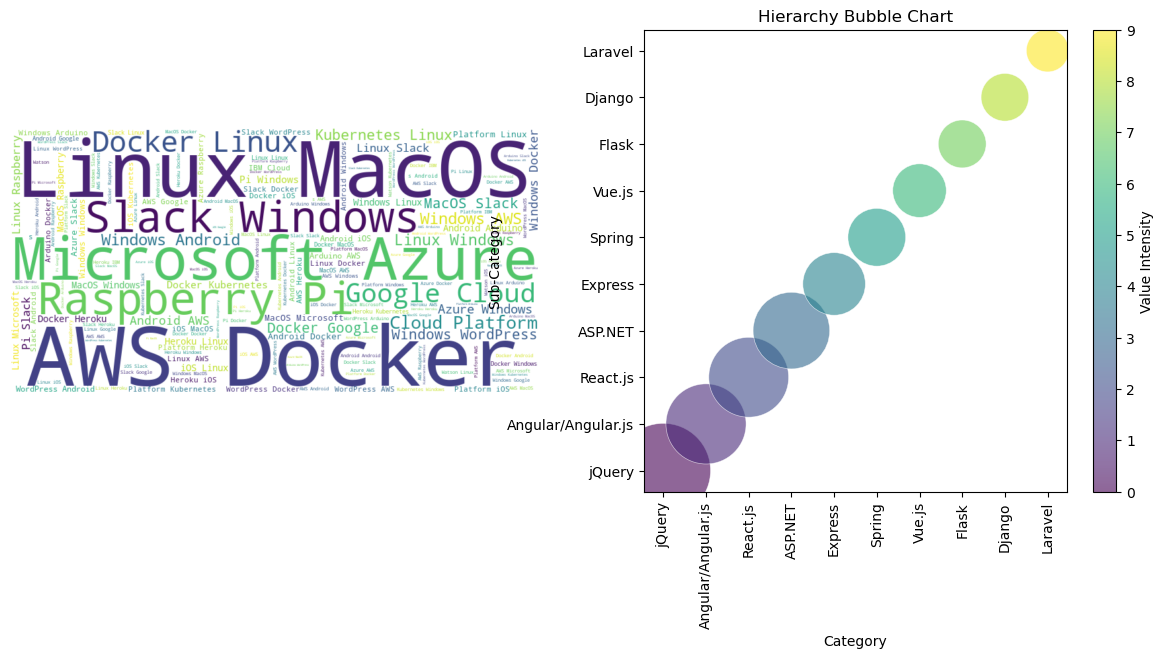

In [190]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,6))
text = ' '.join(df_platform.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis('off')
scatter = ax4.scatter(
    df_wf['Category'],
    df_wf['Sub-Category'],
    s=df_wf['Value'],  # Scale bubble size (adjust as needed)
    c=range(len(df_wf)),  # Use a color gradient
    cmap='viridis',
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5
)
# Add labels and title
ax4.set_title('Hierarchy Bubble Chart')
ax4.set_xlabel('Category')
ax4.set_ylabel('Sub-Category')
# Show the plot
plt.xticks(rotation=90)
plt.colorbar(scatter, ax=ax4, label='Value Intensity')
# plt.show()

/var/folders/0h/2vn5vvwd7px9f7gshycy68hr0000gp/T/ipykernel_50898/1491594532.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



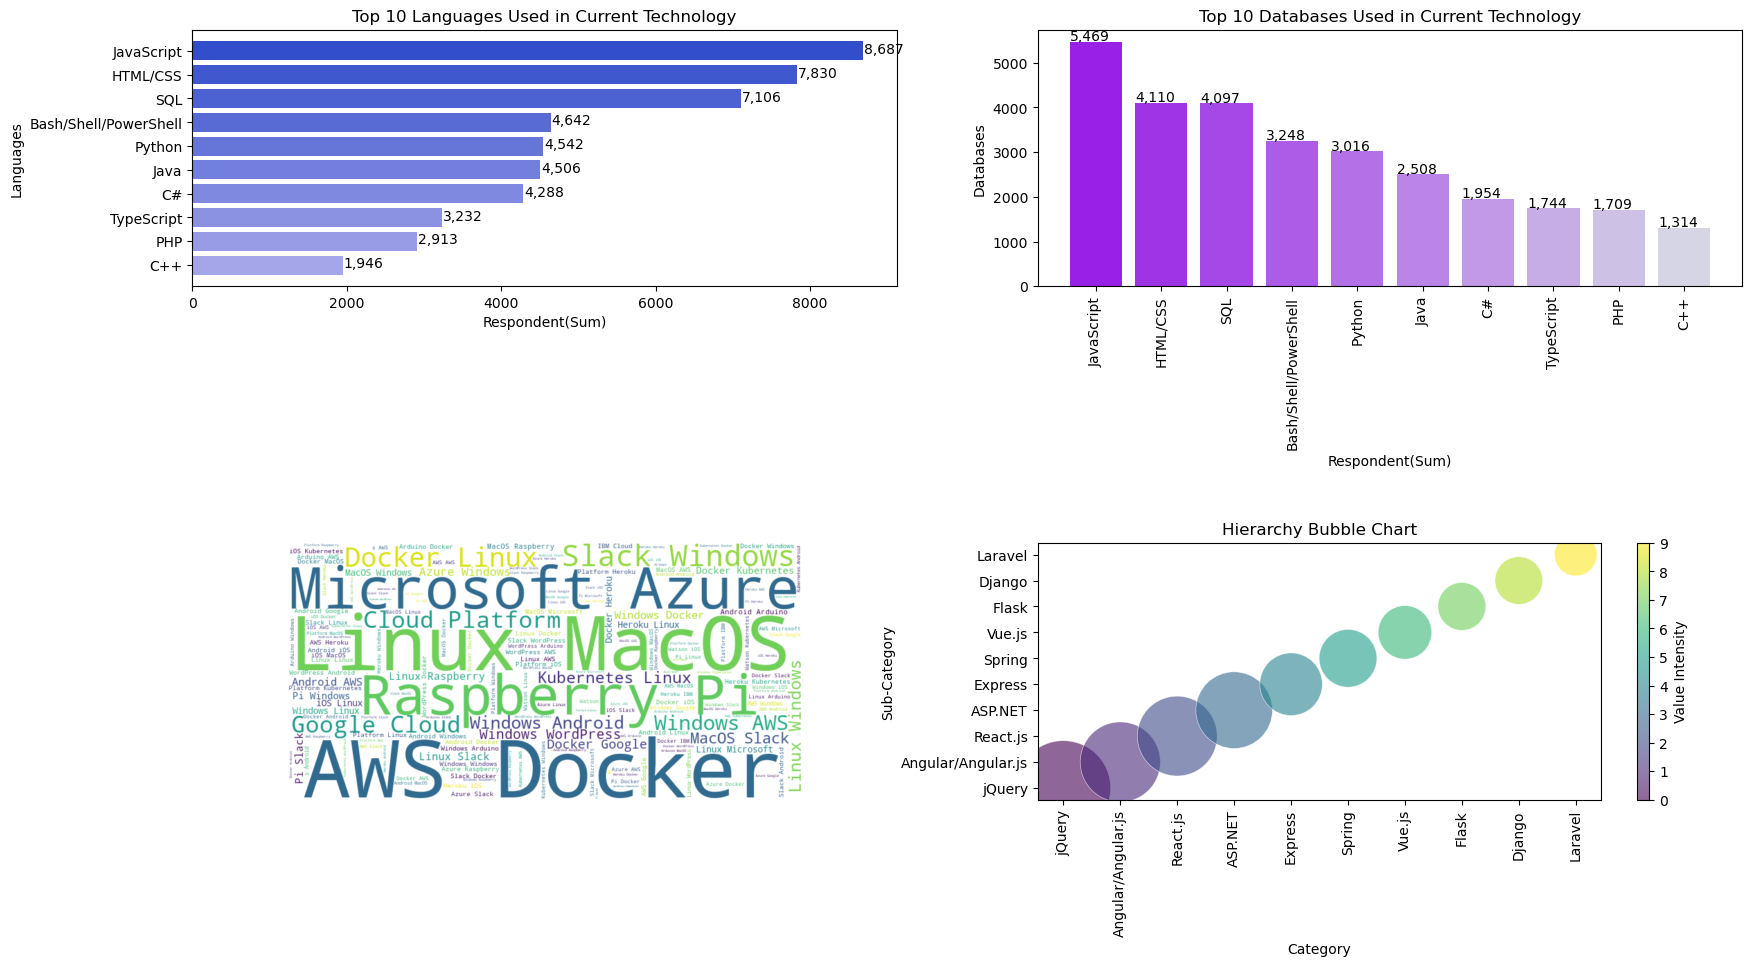

In [198]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.barh(top10_language.index, top10_language,color=colors_blue)
ax1.invert_yaxis()
# Add annotation to bars
for i in ax1.patches:
    ax1.text(i.get_width()+10, i.get_y()+0.5, 
        formatNumber(round((i.get_width()), 2)),
        fontsize = 10, #fontweight ='bold',
        color ='black')
ax1.set_xlabel("Respondent(Sum)")
ax1.set_ylabel("Languages")
ax1.set_title("Top 10 Languages Used in Current Technology")
ax2.bar(top10_db.index, top10_db,color=colors_purple)
for i in ax2.patches:
    ax2.text(i.get_x(), i.get_height()+30, 
        formatNumber(round((i.get_height()), 2)),
        fontsize = 10, #fontweight ='bold',
        color ='black')
ax2.set_xlabel("Respondent(Sum)")
ax2.set_xticklabels(top10_language.index, rotation=90)  
ax2.set_ylabel("Databases")
ax2.set_title("Top 10 Databases Used in Current Technology")
text = ' '.join(df_platform.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis('off')
scatter = ax4.scatter(
    df_wf['Category'],
    df_wf['Sub-Category'],
    s=df_wf['Value'],  # Scale bubble size (adjust as needed)
    c=range(len(df_wf)),  # Use a color gradient
    cmap='viridis',
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5
)
# Add labels and title
ax4.set_title('Hierarchy Bubble Chart')
ax4.set_xlabel('Category')
ax4.set_ylabel('Sub-Category')
# Show the plot
plt.xticks(rotation=90)
plt.colorbar(scatter, ax=ax4, label='Value Intensity')
plt.subplots_adjust(hspace=1)

## Future Technology Trend Tab

### Panel 1[Bar]: Top 10 Languages Desired for Next Year

In [201]:
top10_language_f = df_tech_no_na.groupby('LanguageDesireNextYear').count()
top10_language_f.sort_values('Respondent',ascending=False, inplace=True)
top10_language_f = top10_language_f.iloc[:10]['Respondent']
top10_language_f

LanguageDesireNextYear
JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
Name: Respondent, dtype: int64

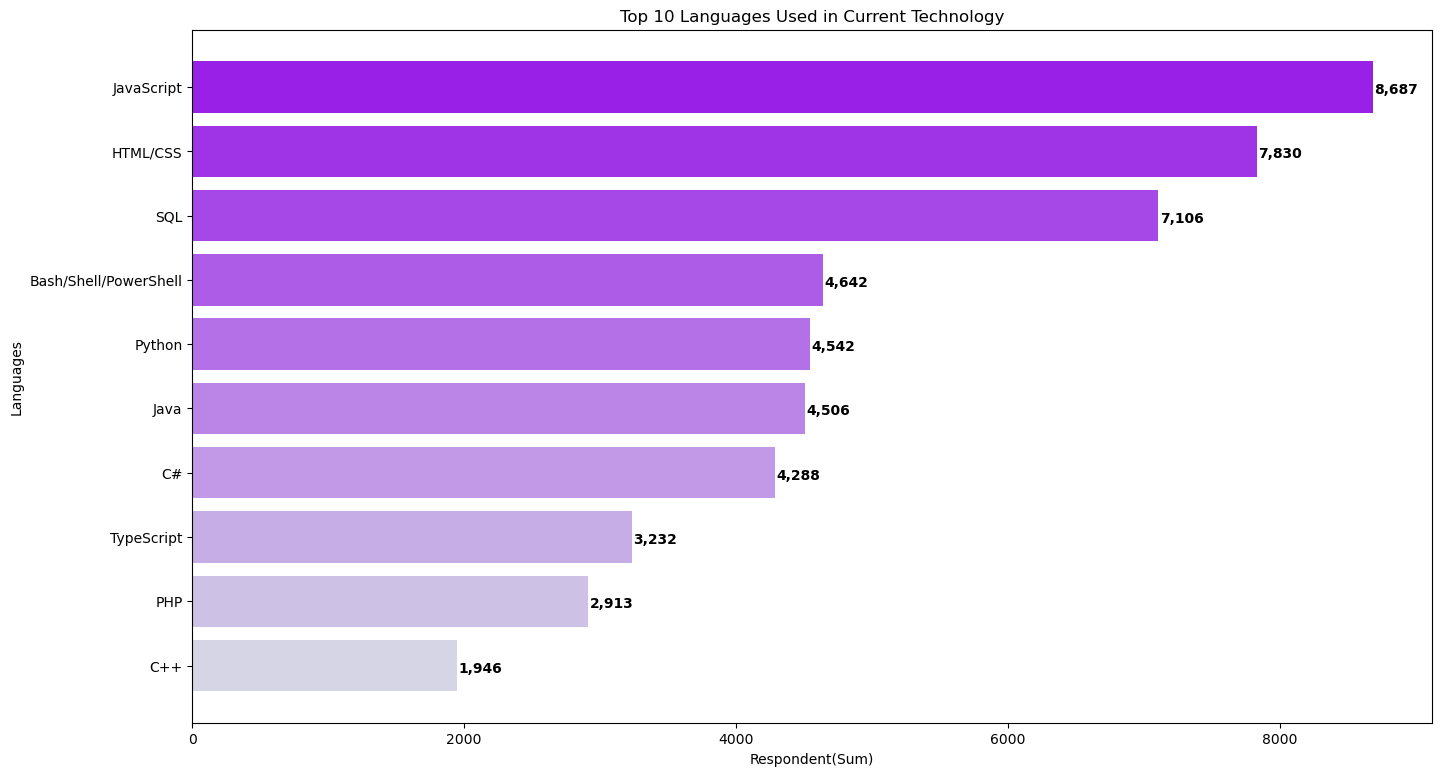

In [213]:
fig, ax = plt.subplots(figsize =(16, 9))
drawBar(ax,top10_language,colors_purple)

### Panel 2[Column]: Top 10 Databases Desired for Next Year

In [215]:
top10_db_f = df_tech_no_na.groupby('DatabaseDesireNextYear').count()
top10_db_f.sort_values('Respondent',ascending=False, inplace=True)
top10_db_f = top10_db_f.iloc[:10]['Respondent']
top10_db_f

DatabaseDesireNextYear
PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Name: Respondent, dtype: int64

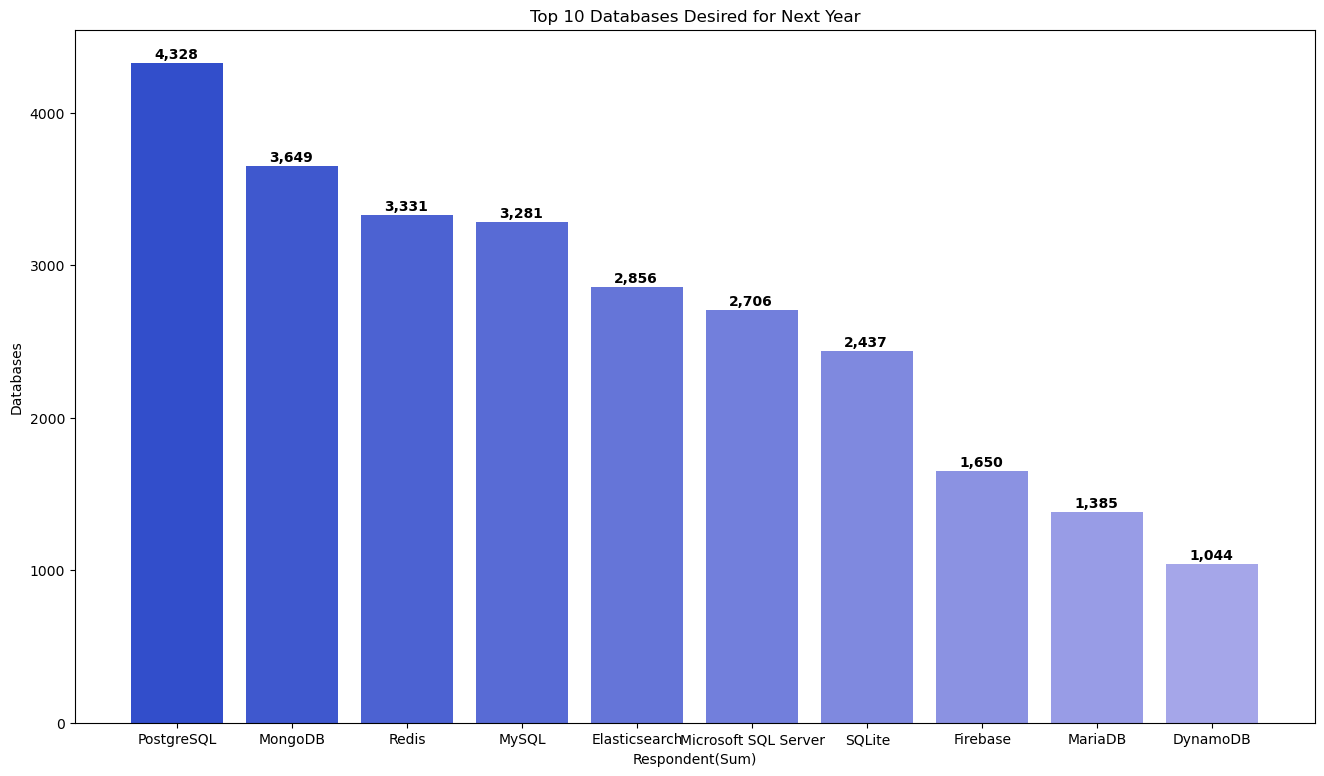

In [219]:
fig, ax = plt.subplots(figsize =(16, 9))
drawColumn(ax,top10_db_f,colors_blue,"Top 10 Databases Desired for Next Year")

### Panel 3[Tree Map Chart]: Platforms Desired for Next Year

In [229]:
df_platform_f = df_tech_no_na.groupby('PlatformDesireNextYear').count()
df_platform_f.sort_values('Respondent',ascending=False, inplace=True)
df_platform_f = df_platform_f['Respondent']
df_platform_f

PlatformDesireNextYear
Linux                    5865
Docker                   5804
AWS                      4442
Windows                  3888
Android                  3231
Kubernetes               3201
MacOS                    2593
Raspberry Pi             2525
Google Cloud Platform    2401
Slack                    2359
Microsoft Azure          2114
iOS                      1987
Arduino                  1399
Heroku                   1121
WordPress                 704
IBM Cloud or Watson       373
Other(s):                 307
Name: Respondent, dtype: int64

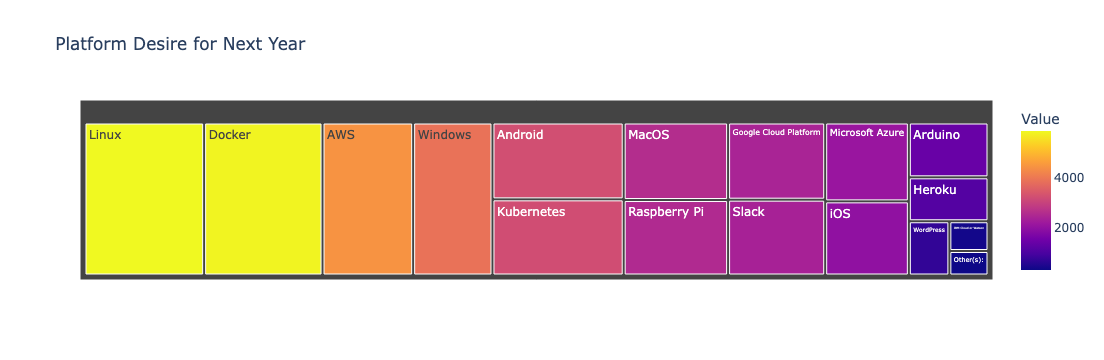

In [235]:
data = {
        'Category': df_platform_f.index.to_list(),
        'Sub-Category': df_platform_f.index.to_list(),
        'Value': df_platform_f.to_list()
    }

# Create a DataFrame
df = pd.DataFrame(data)

# Create a Tree Map chart using Plotly Express
fig = px.treemap(
    df,
    path=['Category'],  # Define the hierarchy
    values='Value',  # Size of the blocks
    color='Value',  # Color based on value
    # color_continuous_scale='Viridis',  # Color scale
    title='Platform Desire for Next Year'
)
# Show the chart
fig.show()

### Panel 4[Hierarchy Bubble Chart]: Top 10 Web Frameworks Desired for Next Year

In [223]:
top10_webframework_f = df_tech_no_na.groupby('WebFrameDesireNextYear').count()
top10_webframework_f.sort_values('Respondent',ascending=False, inplace=True)
top10_webframework_f = top10_webframework_f.iloc[:10]['Respondent']
top10_webframework_f

WebFrameDesireNextYear
React.js              4714
Vue.js                3143
Angular/Angular.js    3059
ASP.NET               2382
jQuery                2241
Express               1957
Spring                1564
Django                1504
Flask                 1240
Ruby on Rails          970
Name: Respondent, dtype: int64

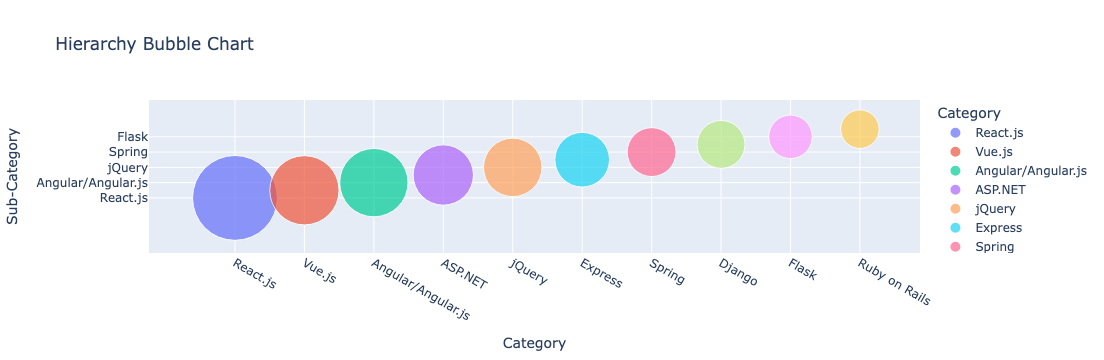

In [224]:
drawHierarchyBubble(top10_webframework_f)

## Demographics

In [240]:
df_tech_no_na_man_woman = df_demographics[(df_demographics["Gender"] == "Man") | (df_demographics["Gender"] == "Woman")]
df_tech_no_na_man_woman.shape,df_demographics.shape

((11211, 70), (11398, 70))

### Panel 1[Pie]: Respondent Gender Distribution

In [247]:
gender = df_tech_no_na_man_woman.groupby('Gender').count()
gender['Respondent'].to_list(),gender.index.to_list()

([10480, 731], ['Man', 'Woman'])

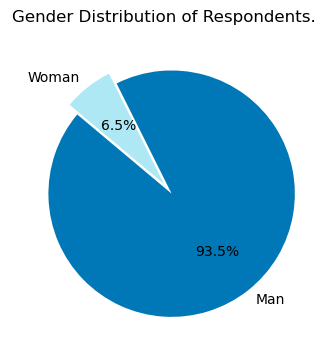

In [255]:
# Sample data for a pie chart
labels = gender.index.to_list()
sizes = gender['Respondent'].to_list()
colors = ['#0077b6', '#ade8f4']
explode = (0.1, 0)  # Explode the first slice for emphasis

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    shadow=False,
    startangle=140  # Start angle for the chart
)

# Add a title
plt.title('Gender Distribution of Respondents.')

# Show the plot
plt.show()

### Panel 2[Map]: Respondent Count by Country

In [260]:
df_tech_no_na_man_woman = df_demographics[(df_demographics["Gender"] == "Man") | (df_demographics["Gender"] == "Woman")]
df_country = df_tech_no_na_man_woman.groupby('Country').count()
df_country['Respondent'],df_tech_no_na_man_woman['Country'].unique()

(Country
 Afghanistan                              2
 Albania                                 12
 Algeria                                  3
 Argentina                               70
 Armenia                                 12
                                         ..
 Uzbekistan                               2
 Venezuela, Bolivarian Republic of...     7
 Viet Nam                                12
 Yemen                                    1
 Zimbabwe                                 5
 Name: Respondent, Length: 135, dtype: int64,
 array(['United States', 'New Zealand', 'United Kingdom', 'Australia',
        'Brazil', 'Lithuania', 'Israel', 'South Africa', 'Czech Republic',
        'Spain', 'Germany', 'Serbia', 'India', 'Sweden', 'China', 'France',
        'Netherlands', 'Philippines', 'Ireland', 'Pakistan', 'Austria',
        'Canada', 'Croatia', 'Italy', 'Russian Federation', 'Argentina',
        'Romania', 'Iran', 'Hungary', 'Latvia', 'Hong Kong (S.A.R.)',
        'United Arab Emi

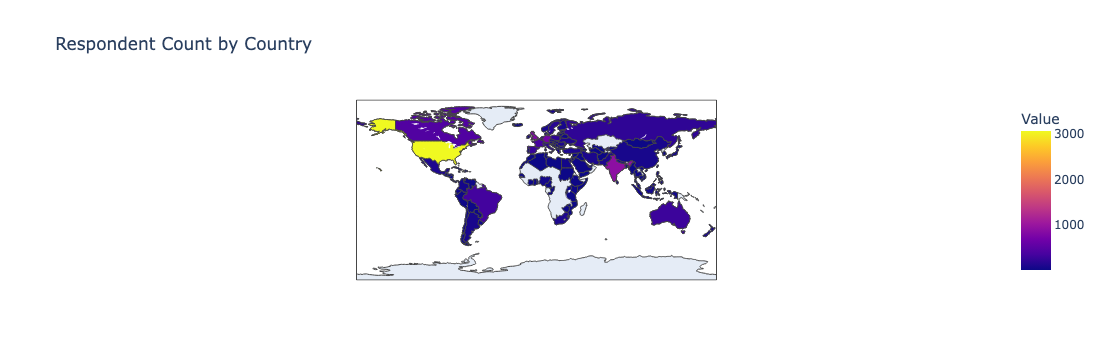

<Figure size 1000x400 with 0 Axes>

In [267]:
fig = plt.figure(figsize = (10, 4))
data = {
    'Country': df_country['Respondent'].index,
    'Value': df_country['Respondent'].to_list()  # Example data values for each country
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map chart
fig = px.choropleth(
    df,
    locations='Country',  # Column with country names
    locationmode='country names',  # Location mode based on country names
    color='Value',  # Column with values to color by
    hover_name='Country',  # Column to display when hovering
    # color_continuous_scale='Viridis',  # Color scale for the map
    title='Respondent Count by Country'
)

# Show the plot
fig.show()

### Panel 3[Line]: Respondent Count by Age

In [270]:
df_age = df_tech_no_na_man_woman.groupby('Age').count()
df_age['Respondent']

Age
16.0      2
17.0      6
18.0     29
19.0     74
20.0    108
21.0    196
22.0    403
23.0    570
24.0    666
25.0    724
26.0    706
27.0    706
28.0    774
29.0    683
30.0    639
31.0    521
32.0    485
33.0    480
34.0    389
35.0    388
36.0    307
37.0    277
38.0    278
39.0    230
40.0    185
41.0    136
42.0    161
43.0    100
44.0     94
45.0     85
46.0     65
47.0     67
48.0     64
49.0     65
50.0     56
51.0     27
52.0     39
53.0     32
54.0     25
55.0     13
56.0     15
57.0     10
58.0     10
59.0     11
60.0      2
61.0     10
62.0      5
63.0      7
65.0      2
66.0      1
67.0      1
71.0      2
72.0      1
99.0      1
Name: Respondent, dtype: int64

<Figure size 1000x400 with 0 Axes>

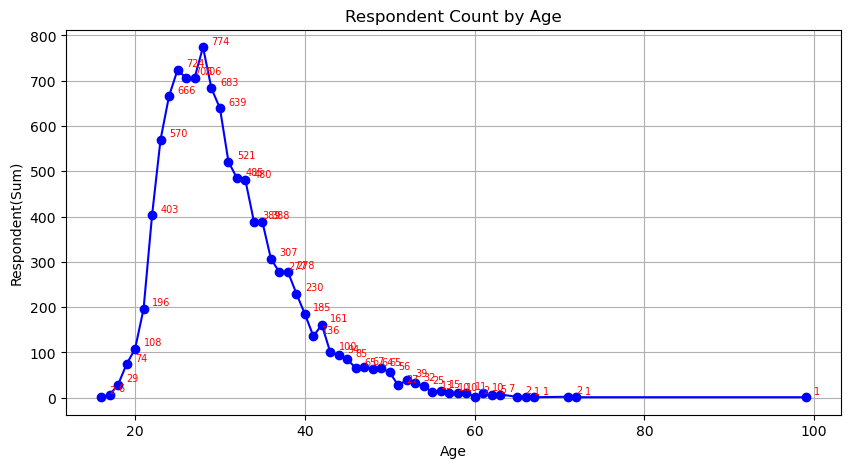

In [284]:
fig = plt.figure(figsize = (10, 4))
data = {
    'Age': df_age['Respondent'].index,
    'Respondent': df_age['Respondent'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(df['Age'], df['Respondent'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Respondent Count by Age')
plt.xlabel('Age')
plt.ylabel('Respondent(Sum)')
for i in range(len(df)):
    plt.text(df['Age'][i]+1, df['Respondent'][i]+7, str(df['Respondent'][i]), fontsize=7, color='red')

# Show gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

### Panel 4[Stacked Bar Chart]: Respondent Count by Gender and Formal Education Level

In [318]:
df_gender = df_tech_no_na_man_woman.groupby('Gender').count()
# df_gender['Respondent'],df_tech_no_na_man_woman['EdLevel'].unique()
df_filtered = df_tech_no_na_man_woman.dropna(subset=['EdLevel'])
edLevel = df_filtered['EdLevel'].unique().tolist()
edLevel

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Some college/university study without earning a degree',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Primary/elementary school',
 'Associate degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Other doctoral degree (Ph.D, Ed.D., etc.)',
 'I never completed any formal education',
 'Professional degree (JD, MD, etc.)']

In [319]:
data = {
    'Gender': df_gender['Respondent'].index.to_list(),
}


In [359]:
for ed in edLevel:
    df_temp = df_filtered[df_filtered["EdLevel"]==ed]
    # print(df_temp.shape,df_filtered.shape)
    df_temp = df_temp[["EdLevel","Gender"]].groupby('Gender').count()
    list1 = [item for sublist in df_temp.values.tolist() for item in sublist]
    if (len(list1) != 2):
        list1.append(0)
    data[ed] = list1
    # print(ed,type(df_temp),df_temp.values.tolist())
data, len(edLevel)

(5753, 70) (11102, 70)
(1330, 70) (11102, 70)
(2675, 70) (11102, 70)
(26, 70) (11102, 70)
(377, 70) (11102, 70)
(506, 70) (11102, 70)
(256, 70) (11102, 70)
(27, 70) (11102, 70)
(152, 70) (11102, 70)


({'Gender': ['Man', 'Woman'],
  'Bachelor’s degree (BA, BS, B.Eng., etc.)': [5341, 412],
  'Some college/university study without earning a degree': [1280, 50],
  'Master’s degree (MA, MS, M.Eng., MBA, etc.)': [2484, 191],
  'Primary/elementary school': [26, 0],
  'Associate degree': [357, 20],
  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': [482,
   24],
  'Other doctoral degree (Ph.D, Ed.D., etc.)': [241, 15],
  'I never completed any formal education': [26, 1],
  'Professional degree (JD, MD, etc.)': [144, 8]},
 9)

In [353]:
# for key, value in data.items():
#     print(f"{key}: {len(value)}")

Gender: 2
Bachelor’s degree (BA, BS, B.Eng., etc.): 2
Some college/university study without earning a degree: 2
Master’s degree (MA, MS, M.Eng., MBA, etc.): 2
Primary/elementary school: 2
Associate degree: 2
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.): 2
Other doctoral degree (Ph.D, Ed.D., etc.): 2
I never completed any formal education: 2
Professional degree (JD, MD, etc.): 2


0    0
1    0
dtype: int64
0    5341
1     412
Name: Bachelor’s degree (BA, BS, B.Eng., etc.), dtype: int64
0    1280
1      50
Name: Some college/university study without earning a degree, dtype: int64
0    2484
1     191
Name: Master’s degree (MA, MS, M.Eng., MBA, etc.), dtype: int64
0    26
1     0
Name: Primary/elementary school, dtype: int64
0    357
1     20
Name: Associate degree, dtype: int64
0    482
1     24
Name: Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.), dtype: int64
0    241
1     15
Name: Other doctoral degree (Ph.D, Ed.D., etc.), dtype: int64
0    26
1     1
Name: I never completed any formal education, dtype: int64


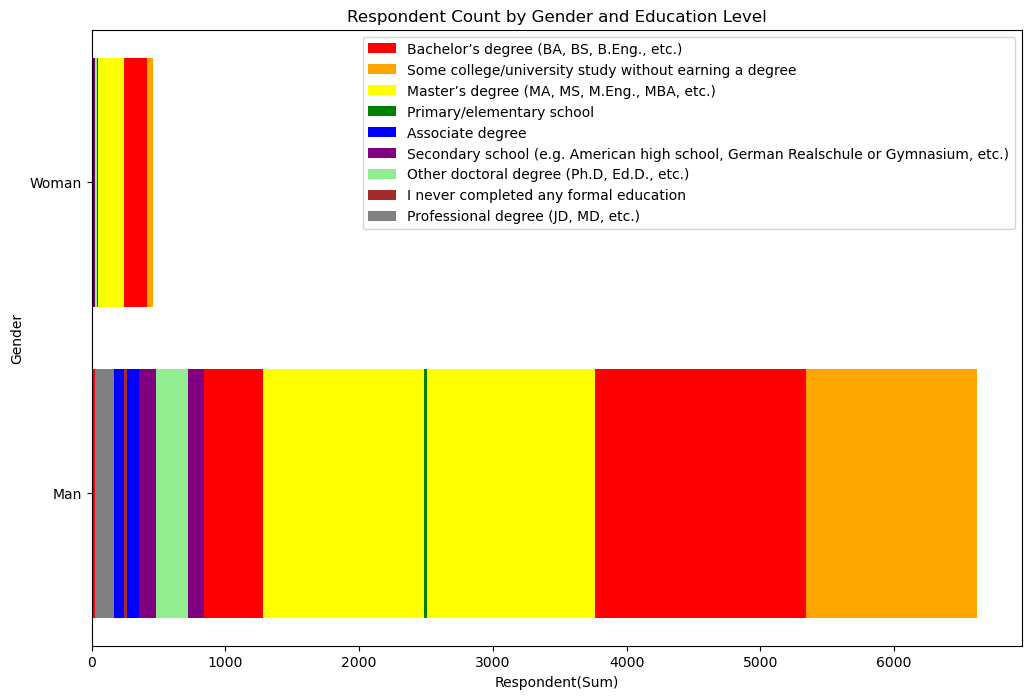

In [361]:
# Create a DataFrame
colors_new = ["red","orange","yellow","green","blue","purple","lightgreen","brown","gray"]#["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]

df = pd.DataFrame(data)
df_sum = pd.Series([0] * len(df))
# Plot the horizontal stacked bar chart
plt.figure(figsize=(12, 8))
for idx in range(len(edLevel)):
    ed = edLevel[idx]
    print(df_sum)
    plt.barh(df['Gender'], df[ed], left=df_sum, label=ed, color=colors_new[idx])
    df_sum = df[ed]

# Add labels and title
plt.title('Respondent Count by Gender and Education Level')
plt.ylabel('Gender')
plt.xlabel('Respondent(Sum)')
plt.legend()

# Show the plot
plt.show()